이번에는 생선이 아닌 와인을 분류해보자. 와인 캔에 인쇄된 도수, 당도, pH 값으로 와인 종류를 구별하면 된다. 와인의 종류는 레드 와인과 화이트 와인이며 타깃값으로 0이면 레드 와인, 1이면 화이트 와인으로 구별한다.

와인 데이터셋을 불러온다.

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

와인 데이터셋을 판다스 데이터프레임으로 제대로 읽어 들였는지 head() 메서드로 처음 5개의 샘플을 확인해보자.

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


처음 3개의 열(alcohol. sugar, pH)는 각각 도수, 당소, pH 값을 나타낸다. 네번째 열(class)은 타깃값으로 0이면 레드 와인, 1이면 화이트 와인이다.  
이진 분류 문제이고, 화이트 와인이 양성 클래스로서 전체 와인 데이터에서 화이트 와인을 골라내는 문제이다.

### 로지스틱 회귀로 와인 분류하기  
로지스틱 회귀 모델을 훈련하기 전에 판다스 데이터프레임의 유용한 메서드 2개를 알아보자.  
- info() 메서드  
    데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는데에 유용하다.

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


출력 결과를 보면 총 6497개의 샘플이 있고 4개의 열은 모두 실숫값이다. Non-Null-Count가 모두 6497이므로 누락된 값은 없는 것으로 보인다.  
만약 누락된 값이 있다면? 그 데이터를 버리거나 평균값으로 채워 사용이 가능하다. 이때에도 항상 훈련 세트의 통계 값으로 테스트 세트로 변환해야 하므로, 즉 훈련 세트의 평균값으로 테스트 세트의 누락된 값을 채워야 한다.

- describe() 메서드  
    열에 대한 간략한 통계를 출력해 준다. 최소, 최대, 평균값 등을 볼 수 있다. 이 메서드를 호출해 보자.

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


평균(mean), 표준편차(std), 최소(min), 최대(max)값을 볼 수 있다. 또 중간값(50%)와 1사분위수(25%), 3사분위수(75%)를 알 수 있다.

여기서 알 수 있는 것은 도수, 당소, pH 값의 스케일이 다르다는 점이다. 이전에 했던 것처럼 사이킷런의 StandardScaler 클래스를 사용해 특성을 표준화해야한다.  
그 전에 판다스 데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나누자.

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

wine 데이터프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data배열에 저장하고 마지막 class열을 넘파이 배열로 바꿔서 target 배열에 저장했다. 이제 훈련 세트와 테스트 세트로 나누어보자.

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


만들어진 훈련 세트와 테스트 세트의 크기는 훈련 세트 5197개, 테스트 세트 1300개로 확인되었다.  
StandardScaler 클래스를 사용해 훈련 세트를 전처리해 보자. 그 다음 같은 객체를 그대로 사용해 테스트 세트를 변환해 보자.

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

이제 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련하자.

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


훈련 세트와 테스트 세트의 점수가 모두 낮아 모델이 과소적합된 것으로 보인다. 이 문제 해결을 위해 규제 매개변수 C의 값을 바꾸어야 할까? solver 매개변수에서 다른 알고리즘을 선택해야 할까? 또는 다항 특성을 만들어 추가해야 할까?   
일단은 값이 도출되었으니 이 모델을 설명하기 위해 로지스틱 회귀가 학습한 계수와 절편을 출력해 보자.

In [10]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


이러한 로지스틱 회귀 모델을 설명하기 위해 아래와 같이 보고서가 작성될 수 있다고 상상이 가능하다.
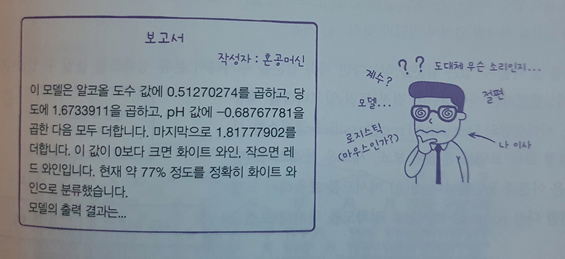  
이 로지스틱 회귀 모델을 잘 이해할 수 있나? 우리는 이 모델이 왜 저런 계수 값을 학습했는지 정확히 이해가 어렵다. 추측만 가능하다. 계수로 미루어 보아 도수와 당도가 높을수록 화이트 와인일 가능성이 높아지고, pH가 낮을수록 화이트 와인일 가능성이 높아진다.  
하지만 정확히 이 숫자가 어떤 의미인지 설명이 어렵고 다항 특성이 추가된다면 더욱 어려워질 것이다.

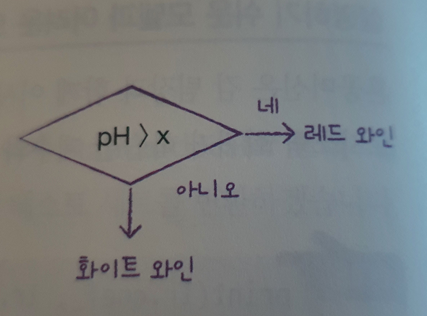
이렇게 쉬운 방법으로 설명이 가능한 모델이 있을까?

### 결정트리(Decision Tree)  
**결정 트리(Decision Tree)**모델은 스무고개와 같다. 그림처럼 질문을 하나씩 던져서 정답과 맞춰가는 것이다.  
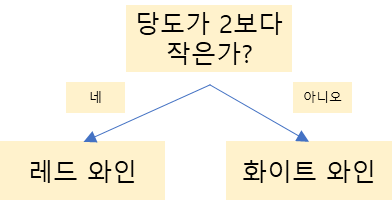  
데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있다.  
사이킷런은 결정 트리 알고리즘을 제공하며 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델을 훈련할 수 있다. 새로운 클래스이지만 사용법은 이전과 동일하다. fit() 메서드를 호출해 모델을 훈련한 다음 score() 메서드로 정확도를 평가할 수 있다.  
--- 

결정 트리 알고리즘을 만들 때 random_state를 지정할 수 있다. 사이킷런의 결정 트리 알고리즘은 노드에서 최적의 분할을 찾기 전에 특성의 순서를 섞는다. 따라서 약간의 무작위성이 발생하는데 실행할 때마다 점수가 조금씩 달라질 수 있다. 여기서는 실습한 결과와 책의 내용이 같기 위해 random_state를 지정하지만 실전에서는 필요 없다.

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


로지스틱 회귀 모델보다 점수가 높다. 테스트 세트의 성능은 그에 비해 조금 낮고 과대적합된 모델로 보인다.  
이 모델을 그림으로 표현 가능할까? 사이킷런은 plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력해 준다.

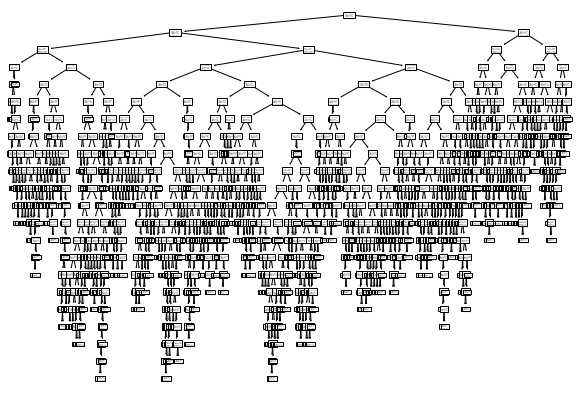

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

결정 트리는 위에서부터 아래로 진행된다. 맨 위의 노드를 루트 노드라 부르고 맨 아래 끝에 달린 노드를 리프 노드라고 한다.  
위의 트리는 너무 복잡하니 plot_tree() 함수에서 트리의 깊이를 제한해서 출력해 보자.  
max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.  
또한 filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있다.  
feature_names 매개변수에는 특성의 이름을 전달할 수 있다.  
이렇게 하면 노드가 어떤 특성으로 나뉘는지 좀 더 잘 이해할 수 있다.

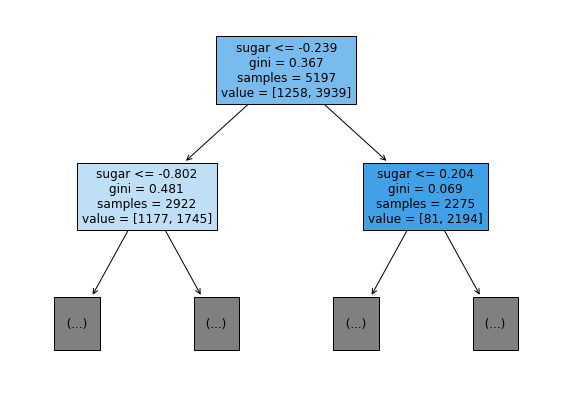

In [13]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

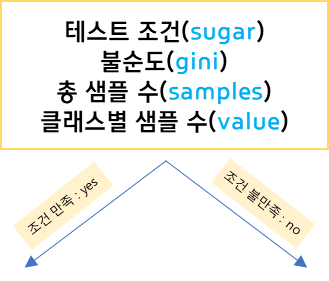  
그림을 보면서 알아보자.  
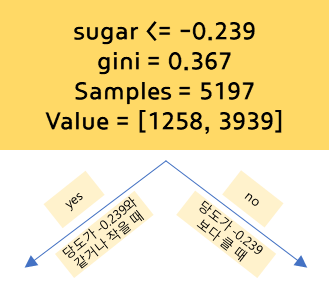  
루트 노드는 당도(sugar)가 -0.239 이하인지 질문을 한다. 만약 어떤 샘플의 당도가 -0.239와 같거나 작으면 왼쪽 가지로 이동한다. 그렇지 않으면 오른쪽 가지로 이동한다.  
루트 노드의 총 샘플 수는 5197개이다.  
이 중에서 음성 클래스(레드 와인)는 1258개이고, 양성 클래스(화이트 와인)는 3939개이다. 이 값이 value에 나타나있다.  
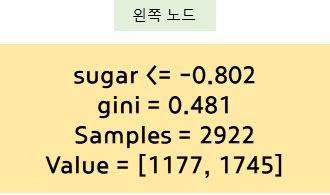  
왼쪽 노드를 살펴보자. 이 노드는 당도가 더 낮은지를 물어본다. 당도가 -0.802와 같거나 낮으면 다시 왼쪽 가지로, 그렇지 않으면 오른쪽 가지로 이동한다.  
이 노드에서 음성 클래스와 양성 클래스의 샘플 개수는 각각 1177개와 1745개이다. 루트 노드보다 양성 클래스, 즉 화이트 와인의 비율이 크게 줄어들었다. 그 이유는 오른쪽 노드를 보면 알 수 있다.  
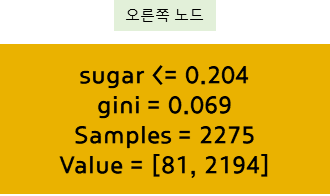  
오른쪽 노드는 음성 클래스가 81개, 양성 클래스가 2194개로 대부분의 화이트 와인 샘플이 이 노드로 이동하였다. 노드의 바탕 색깔을 유심히 보면 이 노드가 루트 노드보다 더 진해지고, 왼쪽 노드는 더 연해졌다.  
plot_tree() 함수에서 filled = True로 지정하면 클래스마다 색깔을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다.

결정 트리에서 예측하는 방법은 간단하다. 리프 노드에서 가장 많은 클래스가 예측 클래스가 된다. 앞에서 보았던 k-최근접 이웃과 매우 비슷하다.  
만약 이 결정 트리의 성장을 여기서 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성 클래스로 예측된다.  
두 노드 모두 양성 클래스의 개수가 많기 때문이다.

만약 결정 트리를 회귀 문제에 적용하면 리프 노드에 도달한 샘플의 타깃을 평균하여 예측값으로 사용한다. 사이킷런의 결정 트리 회귀 모델은 DecisionTreeRegressor이다.

#### 불순도  
gini는 **지니 불순도(Gini impurity)**를 의미한다. DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다. criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다.  
앞의 그린 트리에서 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었을까?  
바로 criterion 매개변수에 지정한 지니 불순도를 사용한다. 그럼 지니 불순도를 어떻게 계산하는지 알아보자.  
  
지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 된다.  
$$ 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2) $$  
  
다중 클래스 문제라면 클래스가 더 많겠지만 계산하는 방법은 동일하다. 그러면 이전 트리 그림에 있던 루트 노드의 지니 불순도를 계산해 보자.  
루트 노드는 총 5197개의 샘플이 있고 그 중에 1258개가 음성 클래스, 3939개가 양성 클래스이다. 따라서 다음과 같이 지니 불순도를 계산할 수 있다.  
$$ 1 - ((1258 / 5197)^2 + (3939 / 5197)^2) = 0.367 $$  
  
만약 100개의 샘플이 있는 어떤 노드의 두 클래스 비율이 정확이 1/2씩이라면 지니 불순도는 0.5가 되어 최악이 된다.  
$$ 1 - ((50/100)^2 + (50/100)^2) = 0.5 $$  
  
노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작다. 이런 노드를 순수 노드라고 부른다.  
$$ 1 - ((0 / 100)^2 + (100 / 100)^2) = 0 $$

결정 트리 모델은 부모 노드(parent node)와 자식 노드(child node)의 불순도 차이가 가능한 크도록 트리를 성장시킨다. 부모 노드와 자식 노드의 불순도 차이를 계산하는 방법을 알아보자.  
먼저 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더한다. 그 다음 부모 노드의 불순도에서 빼면 된다.  
  
예를 들어 앞의 트리 그림에서 루트 노드를 부모 노드라 하면 왼쪽 노드와 오른쪽 노드가 자식 노드가 된다. 왼쪽 노드로는 2922개의 샘플이 이동했고, 오른쪽 노드로는 2275개의 샘플이 이동했다. 그렇다면 불순도의 차이는 다음과 같이 계산한다.  
  
$$ 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 -  $$

$$ (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도 = $$  
  
$$ 0.367 - (2922/5197) * 0.481 - (2275/5197) * 0.069 = 0.066 $$


이런 부모와 자식 노드 사이의 불순도 차이를 **정보 이득(information gain)**이라고 한다.  
이 알고리즘은 정보 이득이 최대가 되도록 데이터를 나눈다. 이때 지니 불순도를 기준으로 사용한다.  
사이킷런에는 또 다른 불순도 기준이 있다.

DecisionTreeClassifier 클래스에서 criterion = 'entropy'를 지정하여 엔트로피 불순도를 사용할 수 있다. 엔트로피 불순도도 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱한다.  
예를 들어 루트 노드의 엔트로피 불순도는 다음과 같이 계산할 수 있다.  


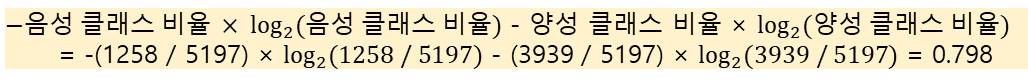  
보통 기본값인 지니 불순도와 엔트로피 불순도가 만든 결과의 차이는 크지 않다.

결정 트리 알고리즘은 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할한다. 노드를 순수하게 나눌수록 정보 이득이 커진다.  
새로운 샘플에 대해 예측할 때에는 노드의 질문에 따라 트리를 이동한다. 그리고 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만든다.  
그런데 앞의 트리는 제한 없이 진행되었기 때문에 훈련 세트보다 테스트 세트에서 점수가 크게 낮았다.

#### 가지치기  
과수원에서 가지치기를 하는 것 처럼 결정 트리도 가지치기를 해야한다. 그렇지 않으면 무작정 끝까지 자라나는 트리가 만들어진다.  
훈련 세트에는 잘 맞겠지만 테스트 세트에서 점수는 그에 미치지 못하게 된다. 이를 두고 일반화가 잘 안될 것 같다고 한다.

결정 트리에서 가지치기를 하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것이다.  
DecisionTreeClassifier 클래스의 max_depth 매개변수를 3으로 지정하여 모델을 만들어 보자. 이렇게 하면 루트 노드 아래로 최대 3개의 노드까지만 성장한다.

In [14]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로이다. 이 모델을 트리 그래프로 그려보자.

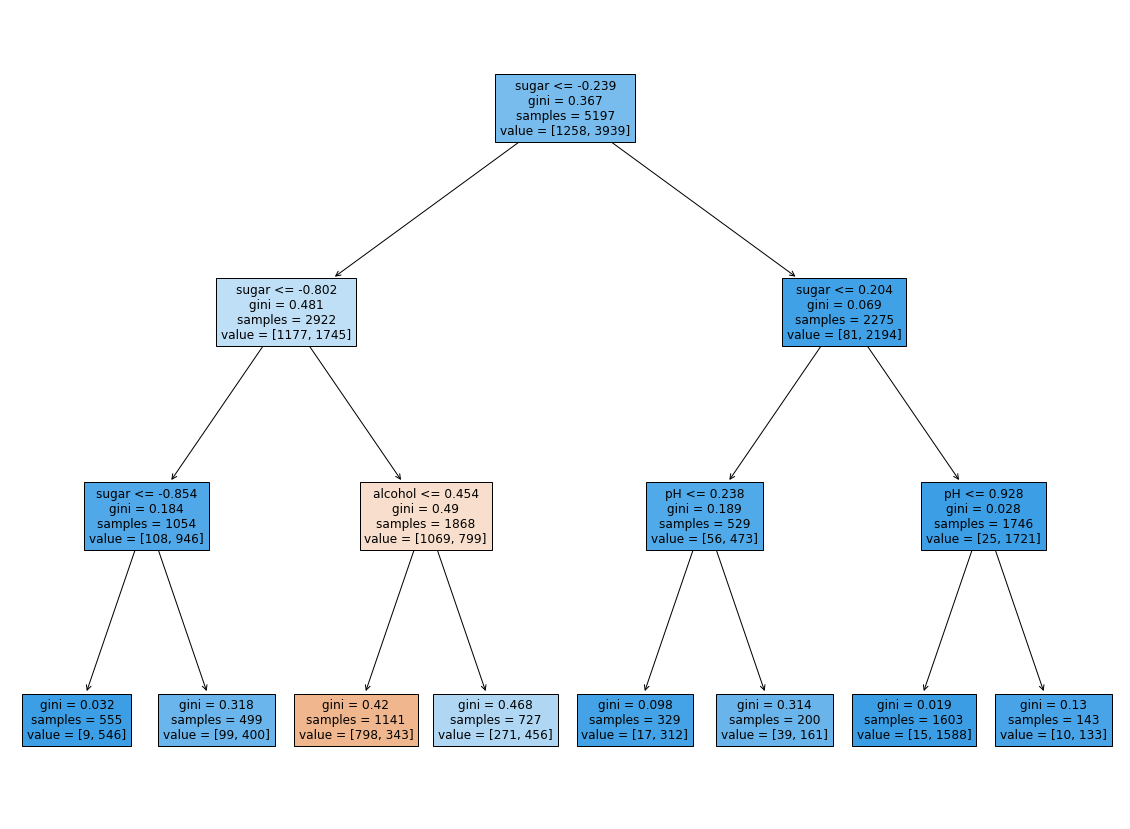

In [19]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

그래프를 따라가며 샘플이 어떻게 나뉘는지 확인할 수 있다. 루트 노드 다음의 있는 깊이 1의 노드는 모두 당도(sugar)를 기준으로 훈련 세트를 나눈다.  
깊이 2의 노드는 맨 왼쪽의 노드만 당도를 기준으로 나누고 왼쪽에서 두 번째 노드는 알코올(alcohol)을 기준으로 나눈다. 오른쪽의 두 노드는 pH를 기준으로 나눈다.  
  
깊이 3에 있는 노드가 최종 노드인 리프 노드이다. 왼쪽에서 세 번째에 있는 노드만 음성 클래스가 더 많다. 이 노드에 도착해야만 레드 와인으로 예측한다. 그러면 루트 노드부터 이 노드까지 도달하려면 당도는 -0.239보다 작고 -0.802보다 커야한다. 그리고 알코올은 0.454보다 작아야 한다. 그러면 세 번째 리프 노드에 도달하게 된다.  
즉 당도가 -0.802 보다 크고 -0.239보다 작은 와인 중에 알코올 도수가 0.454.보다 같거나 작은 것이 레드 와인이다.

-0.802라는 음수로 된 당도는 어떻게 설명해야 할까?  ← StandardScaler를 거쳤기 때문  
앞서 불순도를 기준으로 샘플을 나눈다고 하였다. 불순도는 클래스별 비율을 가지고 계산했다. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산의 영향을 미칠까? 아니다. 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다.  
따라서 표준화 전처리를 할 필요가 없다. 이것이 결정 트리 알고리즘의 장점 중 하나이다.  
그럼 앞서 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델을 다시 훈련해 보자.

In [20]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


결과가 정확히 같다. 트리를 그려보자.

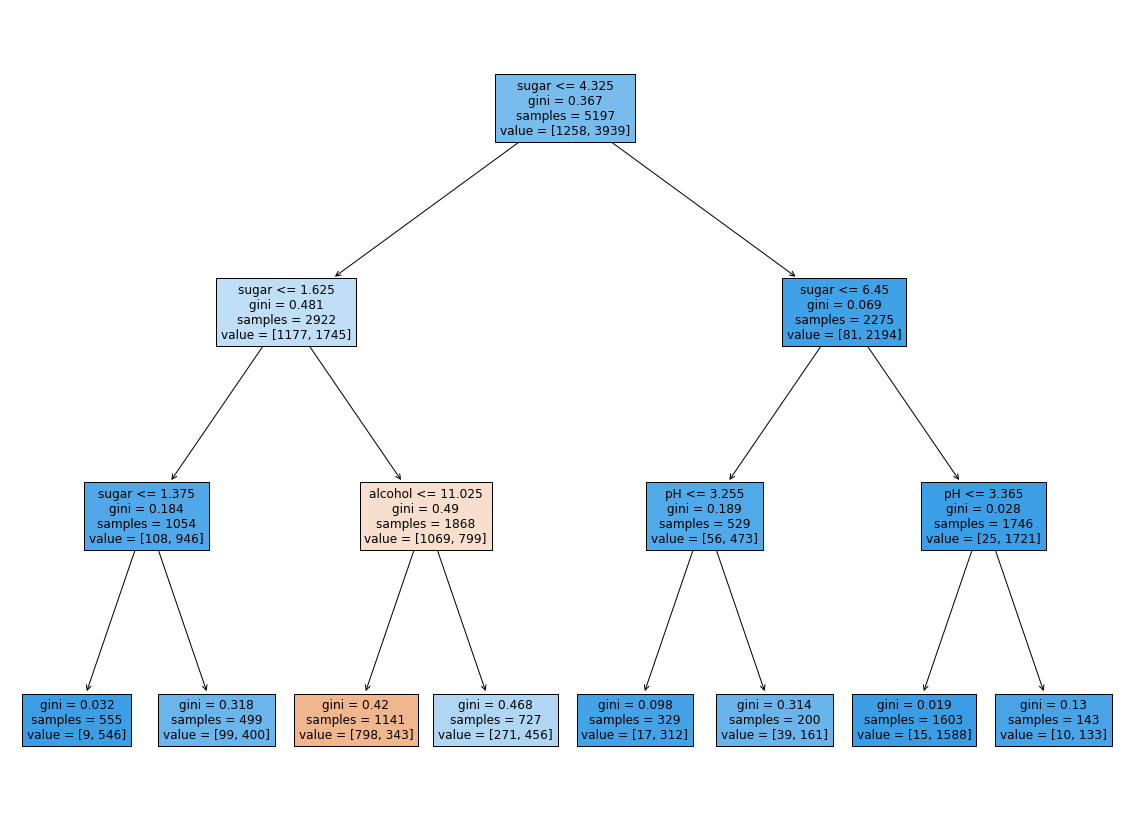

In [21]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않아 이해가 더 쉽다. 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것을 레드 와인으로 예측한다. 그 외에는 모두 화이트 와인으로 예측한다.  
  
마지막으로 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 준다. 이 트리의 루트 노드와 깊이 1에서 당도를 사용했기 때문에 아마도 당도(sugar)가 가장 유용한 특성 중 하나일 것 같다.  
특성 중요도는 결정 트리 모델의 feature_importances_ 속성에 저장되어 있다.

In [22]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


두 번째 특성인 당도가 0.87 정도로 특성 중요도가 가장 높다. 그 다음 알코올 도수, pH 순이다. 이 값을 모두 더하면 1이 된다. 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산된다.  
특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다. 이것이 결정 트리 알고리즘의 장점 중 하나이다.

- **결정 트리**  
    예 / 아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘. 비교적 예측 과정을 이해하기 쉽고 성능도 뛰어나다.  
  
- **불순도**  
    결정 트리가 최적의 질문을 찾기 위한 기준이다. 사이킷런은 지니 불순도와 엔트로피 불순도를 제공한다.  
    
- **정보 이득**  
    부모 노드와 자식 노드의 불순도 차이이다. 결정 트리 알고리즘은 정보 이득이 최대화되도록 학습한다.  
    
- **가지치기**  
    결정 트리는 제한 없이 성장하면 훈련 세트에 과대적합되기 쉽다. 가지치기는 결정 트리의 성장을 제한하는 방법이다. 사이킷런의 결정 트리 알고리즘은 여러 가지 가지치기 매개변수를 제공한다.  
    
- **특성 중요도**  
    결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값이다. 특성 중요도를 계산할 수 있는 것이 결정 트리의 또 다른 장점이다.

### pandas  
- **info()**는 데이터프레임의 요약된 정보를 출력한다. 인덱스와 컬럼 타입을 출력하고 (null)이 아닌 값의 개수, 메모리 사용량을 제공한다.  
<font color=blue>verbose</font> 매개변수의 기본값 True를 False로 바꾸면 각 열에 대한 정보를 출력하지 않는다.  
  
- **describe()**는 데이터프레임 열의 통계 값을 제공한다. 수치형일 경우 최소, 최대, 평균, 표준편차와 사분위값 등이 출력된다.  
문자열 같은 객체 타입의 열은 가장 자주 등장하는 값과 횟수 등이 출력된다.  
<font color=blue>percentiles</font> 매개변수에서 백분위수를 지정한다. 기본값은 [0.25, 0.5, 0.75]이다.

### scikit-learn  
- **DecisionTreeClassifier**는 결정 트리 분류 클래스이다.  
  
    <font color=blue>criterion</font> 매개변수는 불순도를 지정하며 기본값은 지니 불순도를 의미하는 'gini'이고 'entropy'를 선택하여 엔트로피 불순도를 사용할 수 있다.  
   
    <font color=blue>splitter</font> 매개변수는 노드를 분할하는 전략을 선택한다. 기본값은 'best'로 정보 이득이 최대가 되도록 분할한다. 'random'이면 임의로 노드를 분할한다.  
    
    <font color=blue>max_depth</font>는 트리가 성장할 최대 깊이를 지정한다. 기본값은 None으로 리프 노드가 순수하거나 min_samples_split보다 샘플 개수가 적을 때까지 성장한다.  
    
    <font color=blue>min_samples_split</font>은 노드를 나누기 위한 최소 샘플 개수이다. 기본값은 2이다.  
    
    <font color=blue>max_features</font> 매개변수는 최적의 분할을 위해 탐색할 특성의 개수를 지정한다. 기본값은 None으로 모든 특성을 사용한다.  
  
- **plot_tree()**는 결정 트리 모델을 시각화한다. 첫 번째 매개변수로 결정 트리 모델 객체를 전달한다.  
  
    <font color=blue>max_depth</font> 매개변수로 나타낼 트리의 깊이를 지정한다. 기본값은 None으로 모든 노드를 출력한다.  
    
    <font color=blue>feature_names</font> 매개변수로 특성의 이름을 지정할 수 있다.  
    
    <font color=blue>filled</font> 매개변수를 True로 지정하면 타깃값에 따라 노드 안에 색을 채운다.

사이킷런의 결정 트리 클래스가 제공하는 매개변수 중 min_impurity_decrease를 사용해 가지치기를 해보자. 어떤 노드의 정보 이득 × (노드의 샘플 수) / (전체 샘플 수) 값이 이 매개변수보다 작으면 더 이상 분할하지 않는다.  
이 매개변수의 값을 0.0005로 지정하고 결정 트리를 만들어 보자.

0.8874350586877044
0.8615384615384616


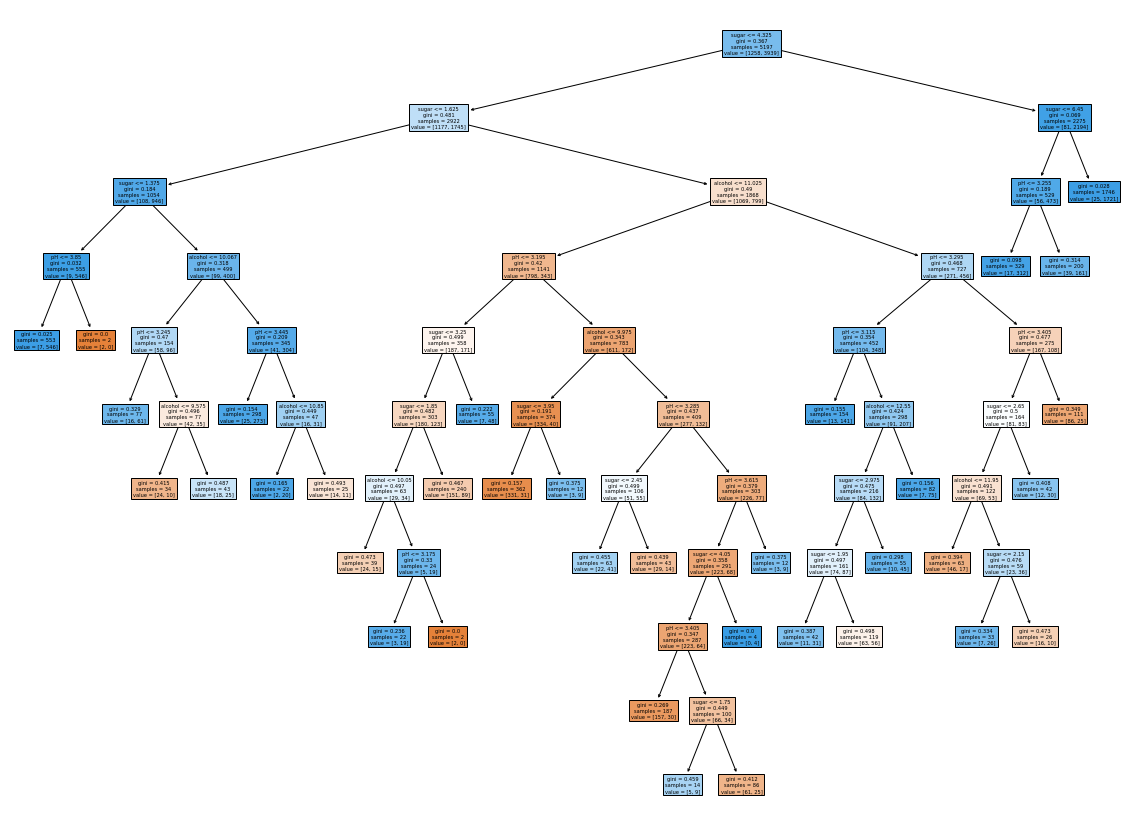

In [23]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()